In [1]:
import pandas as pd
import plotly.express as px

In [5]:
data = pd.read_csv('df_mortgage_rates.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,StateName,Abbrev,Date,AvgPrice,Type,MORTGAGE30US,MonthlyPayment
0,California,CA,2000-01-31,1.980152e+05,SingleFamily,8.25,1089.08
1,Texas,TX,2000-01-31,1.122916e+05,SingleFamily,8.25,617.60
2,Florida,FL,2000-01-31,1.133393e+05,SingleFamily,8.25,623.37
3,New York,NY,2000-01-31,1.373032e+05,SingleFamily,8.25,755.17
4,Pennsylvania,PA,2000-01-31,9.902532e+04,SingleFamily,8.25,544.64
...,...,...,...,...,...,...,...
44365,North Dakota,ND,2024-02-29,4.207995e+05,Multifamily,6.94,1946.90
44366,Alaska,AK,2024-02-29,5.628717e+05,Multifamily,6.94,2604.22
44367,District of Columbia,DC,2024-02-29,1.676258e+06,Multifamily,6.94,7755.49
44368,Vermont,VT,2024-02-29,5.806717e+05,Multifamily,6.94,2686.57


In [11]:
state_avg_payment = data.groupby('Abbrev')['MonthlyPayment'].mean().reset_index()

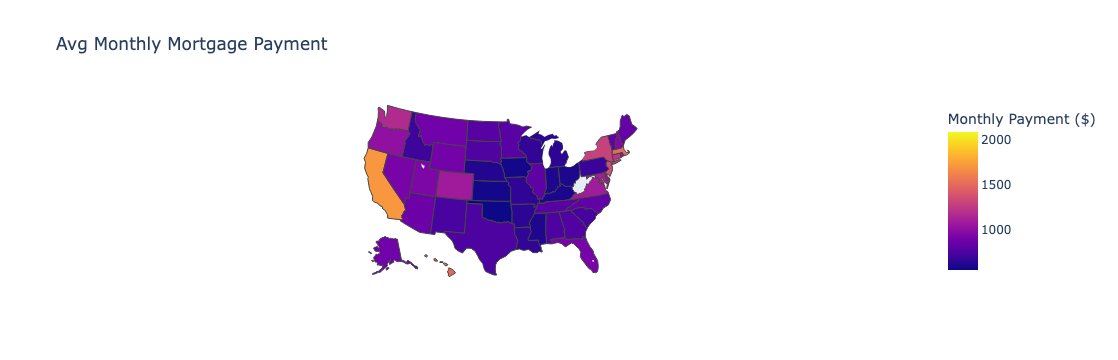

In [13]:
fig = px.choropleth(state_avg_payment, 
                    locations='Abbrev', 
                    locationmode="USA-states", 
                    color='MonthlyPayment', 
                    scope="usa",
                    title="Avg Monthly Mortgage Payment",
                    labels={'MonthlyPayment': 'Monthly Payment ($)'})

# Show the map
fig.show()

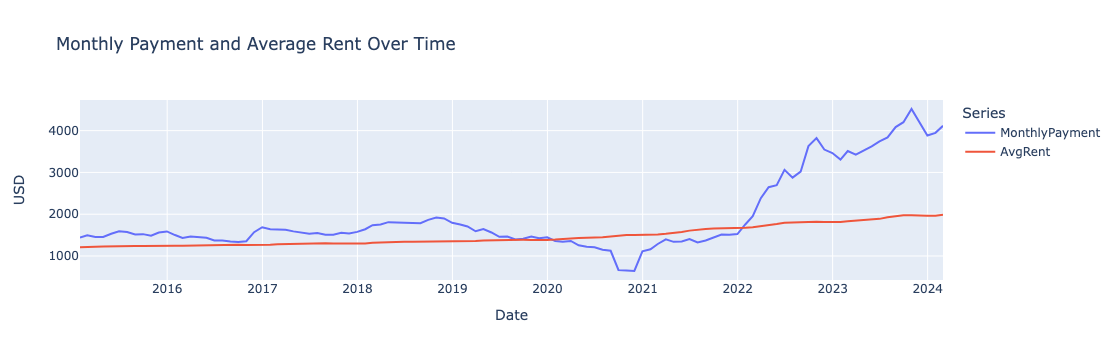

In [15]:
df = pd.read_csv('rents_payments.csv')
df = df[df['Abbrev']=='CT']
fig = px.line(df, x='Date', y=['MonthlyPayment', 'AvgRent'], 
              labels={'value': 'USD', 'variable': 'Series'},
              title='Monthly Payment and Average Rent Over Time')

fig.show()